In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import timedelta
import seaborn as sns

In [2]:
#Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
Rtl_data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Exploratory data analysis

In [3]:
#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape

(541909, 8)

In [4]:
#Check for missing values in the dataset
Rtl_data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#Remove missing values from CustomerID column, can ignore missing values in description column
Rtl_data = Rtl_data[pd.notnull(Rtl_data['CustomerID'])]

#Validate if there are any negative values in Quantity column
Rtl_data.Quantity.min()

-80995

In [6]:
#Validate if there are any negative values in UnitPrice column
Rtl_data.UnitPrice.min()

0.0

In [7]:
#Filter out records with negative values
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]


In [8]:
#Convert the string date field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [9]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['UnitPrice']

In [10]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
Rtl_data.shape

(397924, 9)

In [11]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = Rtl_data['InvoiceDate'].max()
#Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby(['CustomerID','StockCode'],as_index=False).agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,index,CustomerID,StockCode,Recency,Frequency,Monetary
0,0,12346.0,23166,325,1,77183.6
1,1,12347.0,16008,246,1,6.0
2,2,12347.0,17021,182,1,10.8
3,3,12347.0,20665,246,1,17.7
4,4,12347.0,20719,1,4,34.0


C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

Text(0.5,0,'Monetary')

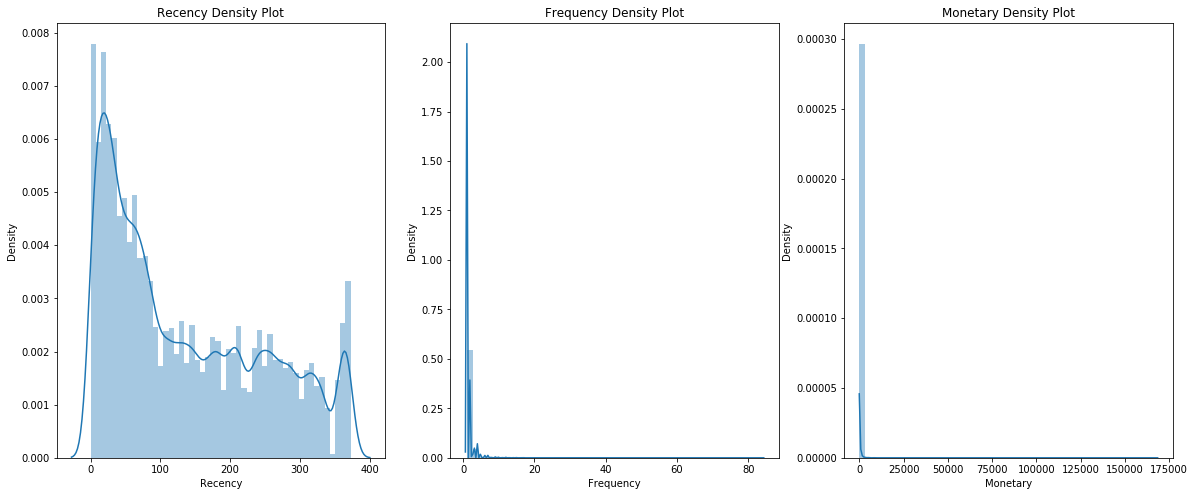

In [32]:
#Exploring the RFM data 

fig, axes = plt.subplots(1, 3,figsize=(20,8))
sns.distplot(np.array(RFMScores['Recency']),ax=axes[0])
sns.distplot(np.array(RFMScores['Frequency']),ax=axes[1])
sns.distplot(np.array(RFMScores['Monetary']),ax=axes[2])

#axis labels
axes[0].set_title('Recency Density Plot')
axes[0].set_xlabel('Recency')

axes[1].set_title('Frequency Density Plot')
axes[1].set_xlabel('Frequency')

axes[2].set_title('Monetary Density Plot')
axes[2].set_xlabel('Monetary')


# Data Preprocessing

In [34]:
#Convert float type CustomerID to Int type as its an ID
RFMScores['CustomerID'] =RFMScores['CustomerID'].astype(int)


In [37]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

In [100]:
RFMScores

,CustomerID,StockCode,Recency,Frequency,Monetary
0,12346,23166,325,1,77183.6
1,12347,16008,246,1,6.0
2,12347,17021,182,1,10.8
3,12347,20665,246,1,17.7
4,12347,20719,1,4,34.0
...,...,...,...,...,...
266797,18287,72351B,58,1,50.4
266798,18287,84507C,201,1,15.3
266799,18287,85039A,58,2,139.2
266800,18287,85039B,58,3,176.4


In [39]:
# Copy orginal data to processing data frame so as not loose original data integrity

RFM_processes=RFMScores.copy()
RFM_processes.head()

,CustomerID,StockCode,Recency,Frequency,Monetary
0,12346,23166,325,1,77183.6
1,12347,16008,246,1,6.0
2,12347,17021,182,1,10.8
3,12347,20665,246,1,17.7
4,12347,20719,1,4,34.0


In [40]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFM_processes[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_Tfd_Data.head()

,Recency,Frequency,Monetary
0,5.784,0.000,11.254
1,5.505,0.000,1.792
2,5.204,0.000,2.380
3,5.505,0.000,2.874
4,0.000,1.386,3.526


C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

Text(0.5,0,'Monetary')

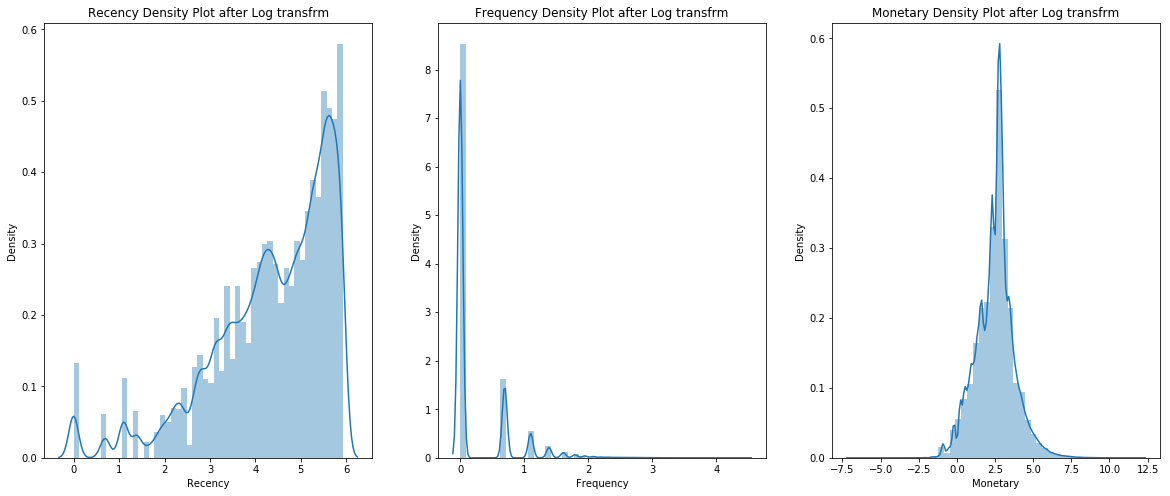

In [48]:
#Exploring the RFM data post Log transformation

fig, axes = plt.subplots(1, 3,figsize=(20,8))
sns.distplot(np.array(Log_Tfd_Data['Recency']),ax=axes[0])
sns.distplot(np.array(Log_Tfd_Data['Frequency']),ax=axes[1])
sns.distplot(np.array(Log_Tfd_Data['Monetary']),ax=axes[2])

#axis labels
axes[0].set_title('Recency Density Plot after Log transfrm')
axes[0].set_xlabel('Recency')

axes[1].set_title('Frequency Density Plot after Log transfrm')
axes[1].set_xlabel('Frequency')

axes[2].set_title('Monetary Density Plot after Log transfrm')
axes[2].set_xlabel('Monetary')


In [44]:
#Inorder to scale RFM in the same scale of 0 - 1 , min max normalization is applied 

#min max normalizations - 
#
# An= Ai-min(A)/(max(A) -min(A))
#
# Where An = normalized A
#       Ai = current value


def normalize(df):
    result = df.copy()
    for feature_name in df[['Recency','Frequency','Monetary']].columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        
    return result

rfm_normalized=normalize(Log_Tfd_Data)
rfm_normalized.head()

,Recency,Frequency,Monetary
0,0.976697,0.000000,0.958771
1,0.929585,0.000000,0.459273
2,0.878757,0.000000,0.490313
3,0.929585,0.000000,0.516391
4,0.000000,0.312796,0.550810


C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

Text(0.5,0,'Monetary')

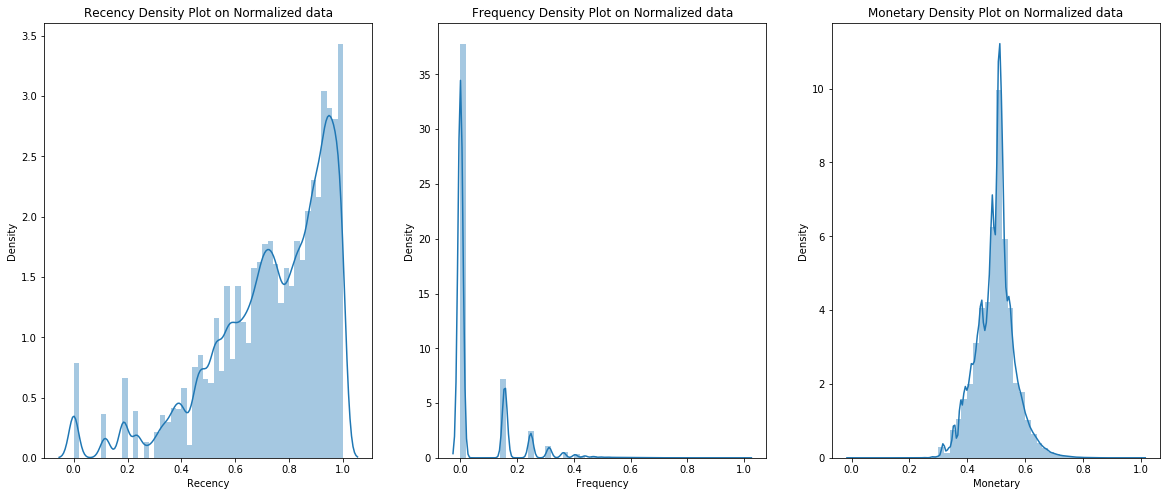

In [46]:
#Exploring the RFM data post data normalization

fig, axes = plt.subplots(1, 3,figsize=(20,8))
sns.distplot(np.array(rfm_normalized['Recency']),ax=axes[0])
sns.distplot(np.array(rfm_normalized['Frequency']),ax=axes[1])
sns.distplot(np.array(rfm_normalized['Monetary']),ax=axes[2])

#axis labels
axes[0].set_title('Recency Density Plot on Normalized data')
axes[0].set_xlabel('Recency')

axes[1].set_title('Frequency Density Plot on Normalized data')
axes[1].set_xlabel('Frequency')

axes[2].set_title('Monetary Density Plot on Normalized data')
axes[2].set_xlabel('Monetary')

# K-means Clustering

In [49]:
#Custom cluster function which takes 
# k = number of clusters
# n = number of iterations
# x = numpy data to perform clustering 

#random centroids by using shuffle func
def int_centroids(x,k):
    centroids=x.copy()
    print(centroids)
    np.random.shuffle(centroids)
    return centroids[:k]
#find the closest centroids 

def closest_centroid(x,centroids):
    dist=  np.sqrt(((x-centroids[:,np.newaxis])**2).sum(axis=2))
    return (np.argmin(dist,axis=0))

def move_centre(x,closest,centroids):
    #find the closest centroid for a given point
    new_centroid= np.array([x[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    
    centd_diff= centroids-new_centroid
    
    #print('Old centroid :' ,centroids)
    #print('new centroid :' ,new_centroid)
    #print('Sum of diff :',sum(sum(centd_diff)))
    
    if (sum(sum(centd_diff))==0):
        conv='CONVERGENCE'
    else:
        conv='NEW CENTROID SEARCHED'
    return new_centroid,conv

#function to call initialize functions,get cnetroids and measure the distance to the closest cluster untill converenge
# with iterations as an function

def my_fit(x,k,n):
    centroids=int_centroids(x,k)
    closest =closest_centroid(x,centroids)
    centroids,conv=move_centre(x,closest,centroids)
    #loop for convergence
    for i in range(n):
    
        closest =closest_centroid(x,centroids)
        centroids,conv=move_centre(x,closest,centroids)
           #print('centroids after:',centroids ,conv)
    #print(conv)
    return(conv,closest)

In [120]:
def clus_plots(df):
    
    fig, axes = plt.subplots(2, 2,figsize=(10,10))
    #fig.suptitle('1 row x 2 columns axes with no data')
    axes[0][0].scatter(df['Recency'],df['cls'],c=np.array(df['cls']))
    #fig.colorbar(sc1, ax=axes[0])

    axes[0][1].scatter(df['Frequency'],df['cls'],c=np.array(df['cls']))
    #fig.colorbar(sc2, ax=axes[1])
    
    axes[1][0].scatter(df['Monetary']/1000,df['cls'],c=np.array(df['cls']))

    sns.distplot(np.array(df['cls']),ax=axes[1][1])

    #sns.distplot(df,x='Recency',ax=axes[1,1],data=x=np.array(df['Recency']),color=np.array(df['cls1']))
    #sns.distplot(ax=axes[1,1],

    axes[0][0].set_title('Recency v/s Cluster Plot')
    axes[0][0].set_xlabel('Recency')
    axes[0][0].set_ylabel('Clusters')

    axes[0][1].set_title('Frequency v/s Cluster Plot')
    axes[0][1].set_xlabel('Frequency')
    axes[0][1].set_ylabel('Clusters')
    
    axes[1][0].set_title('Monetary v/s Cluster Plot')
    axes[1][0].set_xlabel('Monetary in Thousands')
    axes[1][0].set_ylabel('Clusters')
    
    axes[1][1].set_title('Cluster Density Plot')
    axes[1][1].set_xlabel('Cluster')
  

In [53]:
#perform cluster test for k=3

k=3
n=100
conv,cluster_3=my_fit(np.array(rfm_normalized),k,n)
print('Convergence value:',conv)
print('Cluster labels:',cluster_3)
#create a df for 3 cluster value mappingRFM_clus3
RFM_clus3=RFM_processes.copy()
RFM_clus3['cls']=cluster_3
RFM_clus3.head()


[[0.97669706 0.         0.95877105]
 [0.9295846  0.         0.45927255]
 [0.87875718 0.         0.49031304]
 ...
 [0.6855792  0.1563981  0.62524415]
 [0.6855792  0.24802528 0.63775537]
 [0.8954745  0.1563981  0.59547062]]
Convergence value: CONVERGENCE
Cluster labels: [1 1 1 ... 2 2 1]


,CustomerID,StockCode,Recency,Frequency,Monetary,cls
0,12346,23166,325,1,77183.6,1
1,12347,16008,246,1,6.0,1
2,12347,17021,182,1,10.8,1
3,12347,20665,246,1,17.7,1
4,12347,20719,1,4,34.0,0


C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


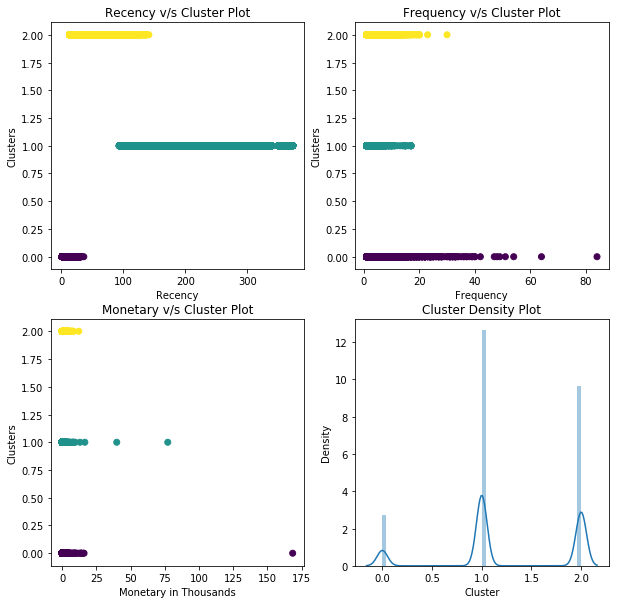

In [121]:
#plot for k=3 clusters
clus_plots(RFM_clus3)

In [67]:
#perform cluster test for k=5

k=5
n=100
conv,cluster_5=my_fit(np.array(rfm_normalized),k,n)
print('Convergence value:',conv)
print('Cluster labels:',cluster_5)

#create a df for 5 cluster value mappingRFM_clus3
RFM_clus5=RFM_processes.copy()
RFM_clus5['cls']=cluster_5
RFM_clus5.head()

[[0.97669706 0.         0.95877105]
 [0.9295846  0.         0.45927255]
 [0.87875718 0.         0.49031304]
 ...
 [0.6855792  0.1563981  0.62524415]
 [0.6855792  0.24802528 0.63775537]
 [0.8954745  0.1563981  0.59547062]]
Convergence value: CONVERGENCE
Cluster labels: [2 2 2 ... 0 0 0]


,CustomerID,StockCode,Recency,Frequency,Monetary,cls
0,12346,23166,325,1,77183.6,2
1,12347,16008,246,1,6.0,2
2,12347,17021,182,1,10.8,2
3,12347,20665,246,1,17.7,2
4,12347,20719,1,4,34.0,3


C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


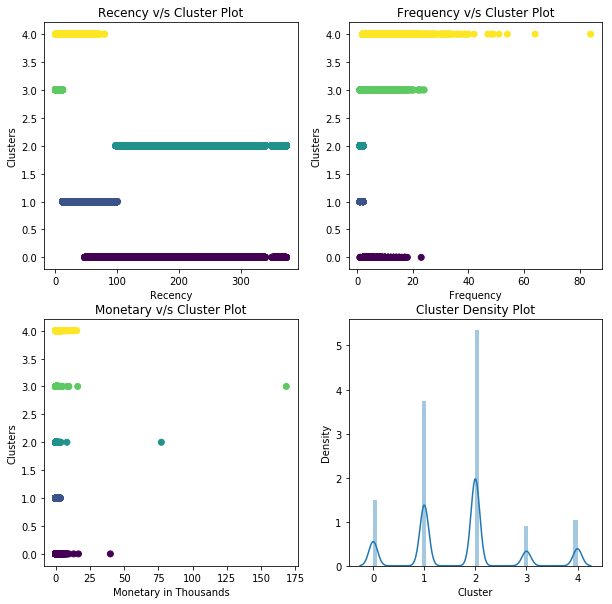

In [122]:
#plot for k=5 clusters
clus_plots(RFM_clus5)

In [65]:
#perform cluster test for k=9

k=9
n=100
conv,cluster_9=my_fit(np.array(rfm_normalized),k,n)
print('Convergence value:',conv)
print('Cluster labels:',cluster_9)

#create a df for 9 cluster value mappingRFM_clus3
RFM_clus9=RFM_processes.copy()
RFM_clus9['cls']=cluster_9
RFM_clus9.head()

[[0.97669706 0.         0.95877105]
 [0.9295846  0.         0.45927255]
 [0.87875718 0.         0.49031304]
 ...
 [0.6855792  0.1563981  0.62524415]
 [0.6855792  0.24802528 0.63775537]
 [0.8954745  0.1563981  0.59547062]]
Convergence value: CONVERGENCE
Cluster labels: [3 5 2 ... 1 1 1]


,CustomerID,StockCode,Recency,Frequency,Monetary,cls
0,12346,23166,325,1,77183.6,3
1,12347,16008,246,1,6.0,5
2,12347,17021,182,1,10.8,2
3,12347,20665,246,1,17.7,3
4,12347,20719,1,4,34.0,4


C:\Users\SABYASACHI SENGUPTA\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


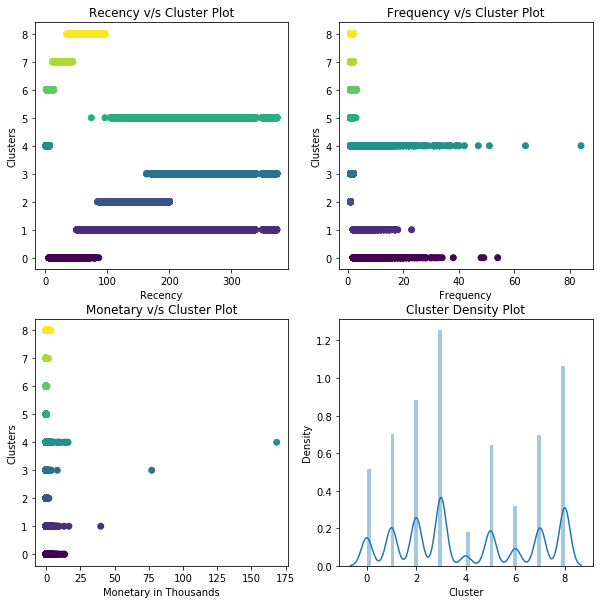

In [123]:
#plot for k=9 clusters
clus_plots(RFM_clus9)

# Ranking for all the cluster segments

In [113]:
#function to get the rank for clustered segments 
def fn_rankclus(x):
    g=x.groupby('cls',as_index=False).agg({'Recency':'mean',
                                                       'Frequency':'mean',
                                                       'Monetary':'mean',
                                                       'CustomerID':'count'})

    g=g.rename(columns={'CustomerID': 'CustomerCount'})
                              
    glog = g[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
    
    #normalized the RFM metrics before applying ank clustering 
    gnormal=normalize(glog[['Recency','Frequency','Monetary']])

    print(gnormal)
    #applied 2^n on RFM and added the rank on the non normalized dataframe n=0 to 2  
    g['rank_poswt']=1*gnormal.Recency +2*gnormal.Frequency+4*gnormal.Monetary
    
    #Experiment applied 2^n on RFM ,with -ive wt on R and added the rank on dataframe n=0 to 2
    g['rank_negwt']=-1*gnormal.Recency +2*gnormal.Frequency+4*gnormal.Monetary

    #dfm=pd.concat((dfm[['CustomerID','StockCode']],dfz),axis=1)
    return g.sort_values('rank_poswt',ascending=False)

In [114]:
#Checking for K=3
fn_rankclus(RFM_clus3)

    Recency  Frequency  Monetary
0  0.000000   1.000000  1.000000
1  1.000000   0.000000  0.000000
2  0.561168   0.275946  0.275742


,cls,Recency,Frequency,Monetary,CustomerCount,rank_poswt,rank_negwt
0,0,7.463203,2.734072,76.198750,29350,6.000000,6.000000
2,2,51.011849,1.511902,33.208884,102713,2.216027,1.093692
1,1,229.360044,1.205197,24.224616,134739,1.000000,-1.000000


In [115]:
#Checking for K=5
fn_rankclus(RFM_clus5)

    Recency  Frequency  Monetary
0  0.880164   0.705615  0.806316
1  0.601745   0.019727  0.000000
2  1.000000   0.000000  0.052632
3  0.000000   0.443096  0.555263
4  0.402874   1.000000  1.000000


,cls,Recency,Frequency,Monetary,CustomerCount,rank_poswt,rank_negwt
4,4,23.157638,3.774637,107.043401,22355,6.402874,5.597126
0,0,148.731605,2.559498,74.044394,31707,5.516657,3.756328
3,3,4.816205,1.810403,45.972889,19130,3.107244,3.107244
2,2,237.184612,1.010518,17.693472,113996,1.210526,-0.789474
1,1,50.225023,1.037004,16.005862,79614,0.641199,-0.562291


In [116]:
#Checking for K=9
fn_rankclus(RFM_clus9)

    Recency  Frequency  Monetary
0  0.525566   0.960576  0.944009
1  0.870062   0.711145  0.853395
2  0.857630   0.000000  0.468488
3  1.000000   0.013647  0.568028
4  0.000000   1.000000  1.000000
5  0.992581   0.030326  0.000000
6  0.259475   0.137225  0.404111
7  0.518548   0.022745  0.374358
8  0.700622   0.028052  0.469029


,cls,Recency,Frequency,Monetary,CustomerCount,rank_poswt,rank_negwt
0,0,26.361737,3.549911,102.608541,21969,6.222753,5.171621
4,4,1.916667,3.738279,126.255559,7764,6.000000,6.000000
1,1,146.940562,2.556091,73.425671,29880,5.705930,3.965806
3,3,280.942160,1.017784,25.553387,53475,3.299406,1.299406
2,2,138.140817,1.000000,17.686718,37673,2.731582,1.016322
8,8,63.098102,1.037635,17.728599,45463,2.632840,1.231597
6,6,6.995326,1.197938,13.943270,13479,2.150371,1.631421
7,7,25.461554,1.029947,12.490012,29652,2.061468,1.024371
5,5,270.787190,1.041134,3.130910,27447,1.053233,-0.931929


# End

In [59]:
# deprecated------ plotting function to plot the 
def clus_plot(df):
    
    fig, axes = plt.subplots(1, 3,figsize=(20,8))
    #fig.suptitle('1 row x 2 columns axes with no data')
    sc1=axes[0].scatter(df['Recency'],df['Monetary'],c=np.array(df['cls']))
    fig.colorbar(sc1, ax=axes[0])

    sc2=axes[1].scatter(df['Frequency'],df['Monetary'],c=np.array(df['cls']))
    fig.colorbar(sc2, ax=axes[1])

    sns.distplot(np.array(df['cls']),ax=axes[2])

    #sns.distplot(df,x='Recency',ax=axes[1,1],data=x=np.array(df['Recency']),color=np.array(df['cls1']))
    #sns.distplot(ax=axes[1,1],

    #axis labels
    axes[0].set_title('Recency v/s Monetary Plot for the clusters')
    axes[0].set_xlabel('Recency')
    axes[0].set_ylabel('Monetary')

    axes[1].set_title('Frequency v/s Monetary for the clusters')
    axes[1].set_xlabel('Frequency')
    axes[1].set_ylabel('Monetary')


    #axis labels
    axes[2].set_title('Cluster Density Plot')
    axes[2].set_xlabel('Recency')


In [119]:
def clus_plots(df):
    
    fig, axes = plt.subplots(2, 2,figsize=(10,10))
    #fig.suptitle('1 row x 2 columns axes with no data')
    axes[0][0].scatter(df['Recency'],df['cls'],c=np.array(df['cls']))
    #fig.colorbar(sc1, ax=axes[0])

    axes[0][1].scatter(df['Frequency'],df['cls'],c=np.array(df['cls']))
    #fig.colorbar(sc2, ax=axes[1])
    
    axes[1][0].scatter(df['Monetary']/1000,df['cls'],c=np.array(df['cls']))

    sns.distplot(np.array(df['cls']),ax=axes[1][1])

    #sns.distplot(df,x='Recency',ax=axes[1,1],data=x=np.array(df['Recency']),color=np.array(df['cls1']))
    #sns.distplot(ax=axes[1,1],

    axes[0][0].set_title('Recency v/s Cluster Plot')
    axes[0][0].set_xlabel('Recency')
    axes[0][0].set_ylabel('Clusters')

    axes[0][1].set_title('Frequency v/s Cluster Plot')
    axes[0][1].set_xlabel('Frequency')
    axes[0][1].set_ylabel('Clusters')
    
    axes[1][0].set_title('Monetary v/s Cluster Plot')
    axes[1][0].set_xlabel('Monetary in Thousands')
    axes[1][0].set_ylabel('Clusters')
    
    axes[1][1].set_title('Cluster Density Plot')
    axes[1][1].set_xlabel('Cluster')
  